In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cgpa_placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in LPA)')

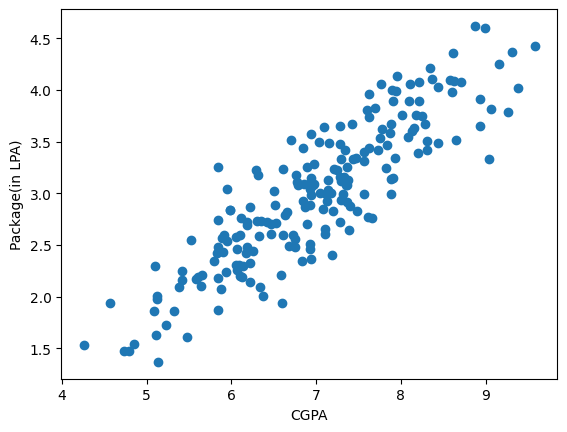

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in LPA)')

In [5]:
# separate rows and columns 

X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [6]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [7]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [8]:
# call train test split model

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [9]:
# As this data is linearly alligned, so wecan apply Linear Regression here

from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()

lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Text(0, 0.5, 'Package(in LPA)')

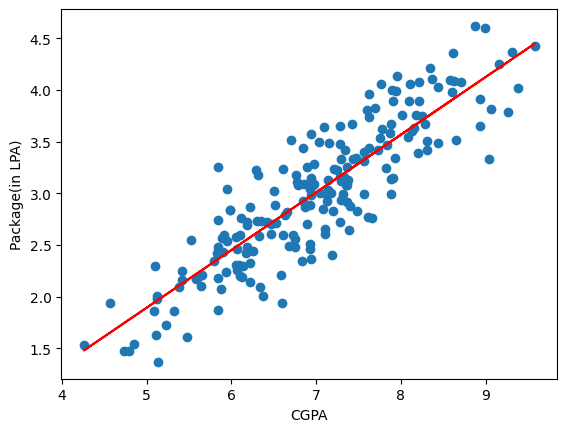

In [11]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train, lr.predict(X_train), color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in LPA)')

In [12]:
# Now, we check Regression metrices here

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
y_pred = lr.predict(X_test)
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [15]:
# Now, check one by one that which regression do mistakes and by how much

In [16]:
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))      # it's unit is in 'lpa' 

# it means 0.28(28%) ka glti kr rha hai hmara model, means hme ise abhi aur reduce krwana hai  

Mean Absolute Error: 0.2884710931878175


In [17]:
print("Mean Squared Error:", mean_squared_error(y_test,y_pred))         # it's unit is in (lpa)^2 

Mean Squared Error: 0.12129235313495527


In [18]:
print("Root mean squared error:", np.sqrt(mean_squared_error(y_test, y_pred)))       # it's unit is in 'lpa' 

Root mean squared error: 0.34827051717731616


In [19]:
# it tells how our model performs

print("R2_score:", r2_score(y_test, y_pred))              # it's unit is in 'lpa' 

# It means that hmara 'cgpa' column 78% variance explain kr pa rha hai, hmare o/p column me
# So, it's not too good but also not too bad (we can also improve it)

R2_score: 0.780730147510384


In [20]:
X_test.shape  

(40, 1)

In [21]:
# Now, comes to the Adjusted_R2_score

# (R2)adj. = 1 - (((1-r2)*(n-1)) / (n-1-k))
# where, r2 = R2_score,
# n = no.of rows, 
# k = no. of i/p columns taken as an input(ex:- 'cgpa', 'iq', 'temp',etc....)
# if i/p column (only 'cgpa', then k=1), ('cgpa' + 'iq', then k=2), ('cgpa' + 'iq' + 'temp', then k=3) 

# we get the value of 'n' and 'k' from X_test:-  n=40 and k=1.  

r2 = r2_score(y_test, y_pred)

print("Adjusted R2_score:", 1 - ( ((1-r2)*(40-1)) / (40-1-1) ))

# it' very close to R2_score

Adjusted R2_score: 0.7749598882343415


In [22]:
# Now, we add extra column, and check that how R2_score's value increases, but (R2_score)adj. decreases for the same data

In [23]:
# Now, we create a new DataFrame from our old DataFrame
 
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)     # we make a new column named 'random_feature'    

new_df1 = new_df1[['cgpa', 'random_feature', 'package']]               
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.802034,3.26
1,5.12,0.838732,1.98
2,7.82,0.891899,3.25
3,7.42,0.885037,3.67
4,6.94,0.922596,3.57


Text(0, 0.5, 'package(in lpa)')

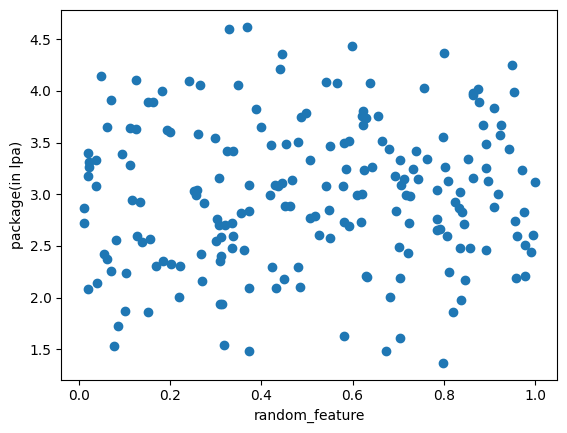

In [24]:
plt.scatter(new_df1['random_feature'], new_df1['package'])
plt.xlabel('random_feature')  
plt.ylabel('package(in lpa)')

# so, we can see the distribution of points is random, it's not linearly alligned  

In [25]:
# Now, we created again separate 'rows' and 'columns'

X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [26]:
# Again, do same train_test_split call 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [27]:
# call fr LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
y_pred = lr.predict(X_test)

In [29]:
# check for R2_score

print("R2 score:",r2_score(y_test,y_pred))                              
r2 = r2_score(y_test,y_pred)

# so, you can see here that R2_score is increased a little bit from before(on adding extra column to it)

R2 score: 0.7776948165965016


In [30]:
X_test.shape

(40, 2)

In [31]:
# Calculate for the Adjusted R2 score:- 

# (R2)adj. = 1 - (((1-r2)*(n-1)) / (n-1-k))
# we get the value of 'n' and 'k' from X_test:-  n=40 and k=2.  

r2 = r2_score(y_test, y_pred)

print("Adjusted R2_score:", 1 - ( ((1-r2)*(40-1)) / (40-1-2) ))  

# so, it's clear that Adjusted R2_score is decreased a little bit from the original one     

Adjusted R2_score: 0.7656783201963125


In [32]:
# now, it's time to add a relevant column i.e., (Ex:- 'iq')

In [33]:
new_df2 = df.copy()
new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa', 'iq', 'package']]

In [34]:
new_df2.head()

,cgpa,iq,package
0,6.89,3.06,3.26
1,5.12,1.58,1.98
2,7.82,3.05,3.25
3,7.42,3.47,3.67
4,6.94,4.37,3.57


Text(0, 0.5, 'package(in LPA)')

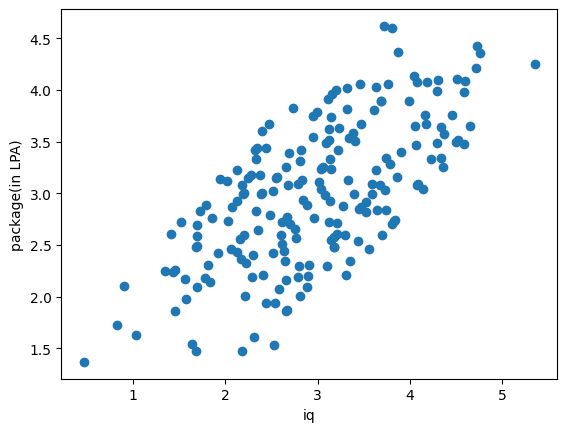

In [35]:
plt.scatter(new_df2['iq'], new_df2['package'])
plt.xlabel('iq')
plt.ylabel('package(in LPA)')

# and, we can see this data is somehow linearly aligned

In [36]:
np.random.randint(-100,100)

-48

In [37]:
# Again, we separate for rows and columns  

X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [38]:
# call the train_test_split_method 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [39]:
#  Apply LinearRegression here

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [40]:
# calculate for R2_score

print("R2_score:", r2_score(y_test, y_pred)) 

# it is increased too much comapred to original dataframe's R2_score

R2_score: 0.8163021608278896


In [41]:
X_test.shape

(40, 2)

In [42]:
# Calculate for the Adjusted R2 score:- 

# (R2)adj. = 1 - (((1-r2)*(n-1)) / (n-1-k))
# we get the value of 'n' and 'k' from X_test:-  n=40 and k=2.   

r2 = r2_score(y_test, y_pred)     

print("Adjusted R2_score:", 1 - ( ((1-r2)*(40-1)) / (40-1-2) ))  

# so, it's clear that Adjusted R2_score is increased from the original one(b/c we add an extra but relevant column to it) 

Adjusted R2_score: 0.8063725478996675
